In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import datetime as dt
import time

In [2]:
data = pd.read_csv("Consolidated2021_NiftyIndex_DataSet.csv")

In [3]:
data

,Date,Open,High,Low,Close,Shares Traded,Turnover (Rs. Cr)
0,01-Jan-97,905.20,941.40,905.20,939.55,38948210,978.21
1,02-Jan-97,941.95,944.00,925.05,927.05,49118380,1150.42
2,03-Jan-97,924.30,932.60,919.55,931.65,35263845,866.74
3,06-Jan-97,932.45,937.95,925.65,927.80,26323660,665.51
4,07-Jan-97,926.35,935.15,922.25,928.80,44473415,1050.05
...,...,...,...,...,...,...,...
5991,02-Feb-21,14481.10,14731.70,14469.15,14647.85,914965225,58177.74
5992,03-Feb-21,14754.90,14868.85,14574.15,14789.95,869477087,49312.35
5993,04-Feb-21,14789.05,14913.70,14714.75,14895.65,884686415,47811.80
5994,05-Feb-21,14952.60,15014.65,14864.75,14924.25,935629058,54394.63


In [4]:
data.drop('Shares Traded',axis =1, inplace= True)
data.drop('Turnover (Rs. Cr)',axis =1, inplace= True)

In [5]:
data['Date_num'] = pd.to_datetime(data['Date'])

In [6]:
data['Date_num']=data['Date_num'].map(dt.datetime.toordinal)

In [7]:
data.head()

,Date,Open,High,Low,Close,Date_num
0,01-Jan-97,905.20,941.40,905.20,939.55,729025
1,02-Jan-97,941.95,944.00,925.05,927.05,729026
2,03-Jan-97,924.30,932.60,919.55,931.65,729027
3,06-Jan-97,932.45,937.95,925.65,927.80,729030
4,07-Jan-97,926.35,935.15,922.25,928.80,729031


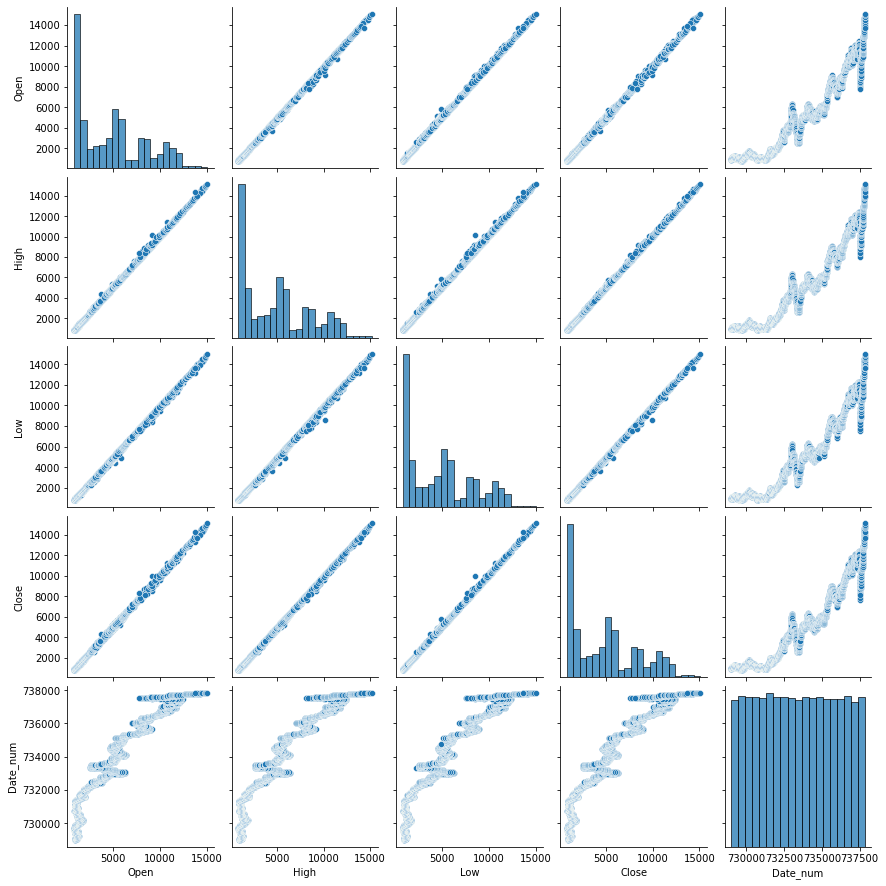

In [8]:
sn.pairplot(data)

In [9]:
data.corr()

,Open,High,Low,Close,Date_num
Open,1.000000,0.999925,0.999896,0.999840,0.955910
High,0.999925,1.000000,0.999855,0.999923,0.956319
Low,0.999896,0.999855,1.000000,0.999914,0.955636
Close,0.999840,0.999923,0.999914,1.000000,0.955993
Date_num,0.955910,0.956319,0.955636,0.955993,1.000000


In [10]:
x = data.iloc[:,5].values

In [22]:
x.shape

(5996,)

In [24]:
x = x.reshape(-1,1)

In [25]:
x

array([[729025],
       [729026],
       [729027],
       ...,
       [737825],
       [737826],
       [737829]])

In [26]:
y = data.iloc[:,1].values

In [27]:
y = y.reshape(-1,1)

In [28]:
y

array([[  905.2 ],
       [  941.95],
       [  924.3 ],
       ...,
       [14789.05],
       [14952.6 ],
       [15064.3 ]])

Text(0, 0.5, 'Open')

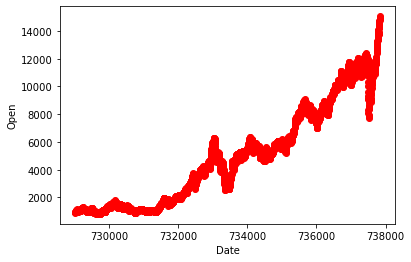

In [29]:
plt.scatter(x,y,color ='red')
plt.xlabel("Date")
plt.ylabel("Open")

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [32]:
x_train

array([[736332],
       [737704],
       [734105],
       ...,
       [734480],
       [729845],
       [735015]])

In [33]:
from sklearn.linear_model import LinearRegression

In [34]:
regression = LinearRegression()

In [35]:
regression.fit(x_train,y_train)

LinearRegression()

In [36]:
y_pred=regression.predict(x_test)

In [38]:
y_test

array([[10216.25],
       [  992.45],
       [ 8732.95],
       ...,
       [10812.6 ],
       [  941.6 ],
       [ 2813.4 ]])

In [39]:
y_pred

array([[9385.47144417],
       [  94.85964111],
       [8660.62451783],
       ...,
       [9476.41164895],
       [2141.01424866],
       [4841.13591706]])

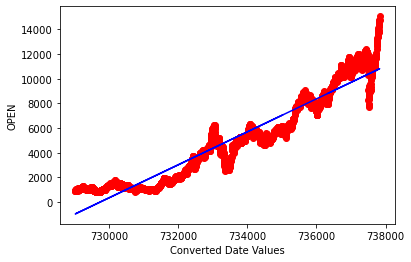

In [44]:
plt.scatter(x_train,y_train,color='red')
plt.plot(x_train,regression.predict(x_train),color='blue')
plt.xlabel("Converted Date Values")
plt.ylabel("OPEN")
plt.show()

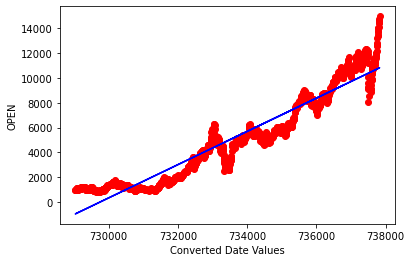

In [46]:
plt.scatter(x_test,y_test,color='red')
plt.plot(x_test,regression.predict(x_test),color='blue')
plt.xlabel("Converted Date Values")
plt.ylabel("OPEN")
plt.show()

In [47]:
y_pred = regression.predict(x_test)
print(regression.intercept_)

[-975926.23758569]


In [49]:
regression.coef_

array([[1.33735595]])

In [50]:
datetime = dt.date(year= 2021, month=2, day=22)
datetime.toordinal()

737843

In [52]:
y_pred = regression.predict([[737843]])
y_pred

array([[10832.49058493]])